In [1]:
import pandas as pd
import numpy as np
import requests
import os
from dotenv import load_dotenv
import json
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

load_dotenv()

True

In [7]:
API_KEY = os.getenv('ODDS_API_KEY')
BASE_URL = os.getenv('ODDS_API_BASE_URL')

league_index = 0

In [8]:
odds_api_get_sports = f'{BASE_URL}/v4/sports/?apiKey={API_KEY}'

r = requests.get(odds_api_get_sports)

In [9]:
sport_keys = []
for sport in r.json():
    
    print(sport['key'])
    sport_keys.append(sport['key'])

americanfootball_cfl
americanfootball_ncaaf
americanfootball_ncaaf_championship_winner
americanfootball_nfl
americanfootball_nfl_super_bowl_winner
aussierules_afl
baseball_kbo
baseball_milb
baseball_mlb
baseball_mlb_world_series_winner
baseball_npb
basketball_nba
basketball_nba_championship_winner
basketball_ncaab_championship_winner
basketball_wnba
boxing_boxing
cricket_caribbean_premier_league
cricket_international_t20
cricket_odi
cricket_t20_blast
golf_masters_tournament_winner
icehockey_nhl
icehockey_nhl_championship_winner
icehockey_sweden_allsvenskan
icehockey_sweden_hockey_league
lacrosse_pll
mma_mixed_martial_arts
politics_us_presidential_election_winner
rugbyleague_nrl
soccer_argentina_primera_division
soccer_austria_bundesliga
soccer_brazil_campeonato
soccer_brazil_serie_b
soccer_chile_campeonato
soccer_china_superleague
soccer_conmebol_copa_libertadores
soccer_conmebol_copa_sudamericana
soccer_denmark_superliga
soccer_efl_champ
soccer_england_league1
soccer_england_league2
s

In [10]:
t_sport_keys = [sk for sk in sport_keys if sk.startswith('baseball')]
t_sport_keys = [sk for sk in t_sport_keys if 'mlb' in sk]
t_sport_keys = [sk for sk in t_sport_keys if 'winner' not in sk]
t_sport_keys

['baseball_mlb']

In [11]:
odds_api_get_odds = f'{BASE_URL}/v4/sports/{t_sport_keys[league_index]}/odds/?apiKey={API_KEY}&regions=us,us2&markets=h2h,spreads,totals'
odds_api_get_odds

'https://api.the-odds-api.com/v4/sports/baseball_mlb/odds/?apiKey=b746bcb6c719ae89993ad14f5b8f1114&regions=us,us2&markets=h2h,spreads,totals'

In [12]:
r2 = requests.get(odds_api_get_odds)

r2.json()

[{'id': '2bbf43ad7a1fe7067dcd3b3728425e98',
  'sport_key': 'baseball_mlb',
  'sport_title': 'MLB',
  'commence_time': '2025-09-02T22:40:00Z',
  'home_team': 'Cincinnati Reds',
  'away_team': 'Toronto Blue Jays',
  'bookmakers': [{'key': 'fanduel',
    'title': 'FanDuel',
    'last_update': '2025-09-02T18:06:28Z',
    'markets': [{'key': 'h2h',
      'last_update': '2025-09-02T18:06:28Z',
      'outcomes': [{'name': 'Cincinnati Reds', 'price': 1.93},
       {'name': 'Toronto Blue Jays', 'price': 1.93}]},
     {'key': 'spreads',
      'last_update': '2025-09-02T18:06:28Z',
      'outcomes': [{'name': 'Cincinnati Reds', 'price': 1.56, 'point': 1.5},
       {'name': 'Toronto Blue Jays', 'price': 2.46, 'point': -1.5}]},
     {'key': 'totals',
      'last_update': '2025-09-02T18:06:28Z',
      'outcomes': [{'name': 'Over', 'price': 1.85, 'point': 8.5},
       {'name': 'Under', 'price': 1.96, 'point': 8.5}]}]},
   {'key': 'lowvig',
    'title': 'LowVig.ag',
    'last_update': '2025-09-02T18:0

In [13]:
for card in r2.json():
    print(card)
    print('========================')

{'id': '2bbf43ad7a1fe7067dcd3b3728425e98', 'sport_key': 'baseball_mlb', 'sport_title': 'MLB', 'commence_time': '2025-09-02T22:40:00Z', 'home_team': 'Cincinnati Reds', 'away_team': 'Toronto Blue Jays', 'bookmakers': [{'key': 'fanduel', 'title': 'FanDuel', 'last_update': '2025-09-02T18:06:28Z', 'markets': [{'key': 'h2h', 'last_update': '2025-09-02T18:06:28Z', 'outcomes': [{'name': 'Cincinnati Reds', 'price': 1.93}, {'name': 'Toronto Blue Jays', 'price': 1.93}]}, {'key': 'spreads', 'last_update': '2025-09-02T18:06:28Z', 'outcomes': [{'name': 'Cincinnati Reds', 'price': 1.56, 'point': 1.5}, {'name': 'Toronto Blue Jays', 'price': 2.46, 'point': -1.5}]}, {'key': 'totals', 'last_update': '2025-09-02T18:06:28Z', 'outcomes': [{'name': 'Over', 'price': 1.85, 'point': 8.5}, {'name': 'Under', 'price': 1.96, 'point': 8.5}]}]}, {'key': 'lowvig', 'title': 'LowVig.ag', 'last_update': '2025-09-02T18:06:14Z', 'markets': [{'key': 'h2h', 'last_update': '2025-09-02T18:06:14Z', 'outcomes': [{'name': 'Cincin

In [14]:
today_str = datetime.today().strftime('%Y-%m-%d')

r2_text = json.dumps(r2.json())
with open(f'./odds_data/{today_str}_{t_sport_keys[league_index]}_odds.txt','w') as outfile:
    outfile.write(r2_text)

In [15]:
data = r2.json()

In [16]:
rows = []
for event in data:
    for bookmaker in event["bookmakers"]:
        for market in bookmaker["markets"]:
            market_send = ''
            team_send = ''
            
            for outcome in market["outcomes"]:
                if market["key"] == "h2h":
                    market_send = "h2h"
                    team_send = outcome["name"]
                elif market["key"] in ["totals", "spreads"]:
                    market_send = market["key"]
                    team_send = f'{outcome["name"]} {outcome["point"]}'
                rows.append({
                    "game": f"{event['home_team']} vs {event['away_team']}",
                    "commence_time": event["commence_time"],
                    "bookmaker": bookmaker["title"],
                    "team": team_send,
                    "decimal_odds": outcome["price"],
                    "implied_prob": 1.0 / float(outcome["price"]),
                    "market": market_send,
                })
            

df = pd.DataFrame(rows)
df['commence_time'] = pd.to_datetime(df['commence_time'])
print(df.head(10))

                                   game             commence_time  bookmaker  \
0  Cincinnati Reds vs Toronto Blue Jays 2025-09-02 22:40:00+00:00    FanDuel   
1  Cincinnati Reds vs Toronto Blue Jays 2025-09-02 22:40:00+00:00    FanDuel   
2  Cincinnati Reds vs Toronto Blue Jays 2025-09-02 22:40:00+00:00    FanDuel   
3  Cincinnati Reds vs Toronto Blue Jays 2025-09-02 22:40:00+00:00    FanDuel   
4  Cincinnati Reds vs Toronto Blue Jays 2025-09-02 22:40:00+00:00    FanDuel   
5  Cincinnati Reds vs Toronto Blue Jays 2025-09-02 22:40:00+00:00    FanDuel   
6  Cincinnati Reds vs Toronto Blue Jays 2025-09-02 22:40:00+00:00  LowVig.ag   
7  Cincinnati Reds vs Toronto Blue Jays 2025-09-02 22:40:00+00:00  LowVig.ag   
8  Cincinnati Reds vs Toronto Blue Jays 2025-09-02 22:40:00+00:00  LowVig.ag   
9  Cincinnati Reds vs Toronto Blue Jays 2025-09-02 22:40:00+00:00  LowVig.ag   

                     team  decimal_odds  implied_prob   market  
0         Cincinnati Reds          1.93      0.518135 

In [17]:
df_old = df.copy()
# current date (UTC) + 8 days
cutoff = pd.Timestamp.now(tz="UTC") + pd.Timedelta(days=8)
df = df.loc[df['commence_time'] <= cutoff].reset_index(drop=True)

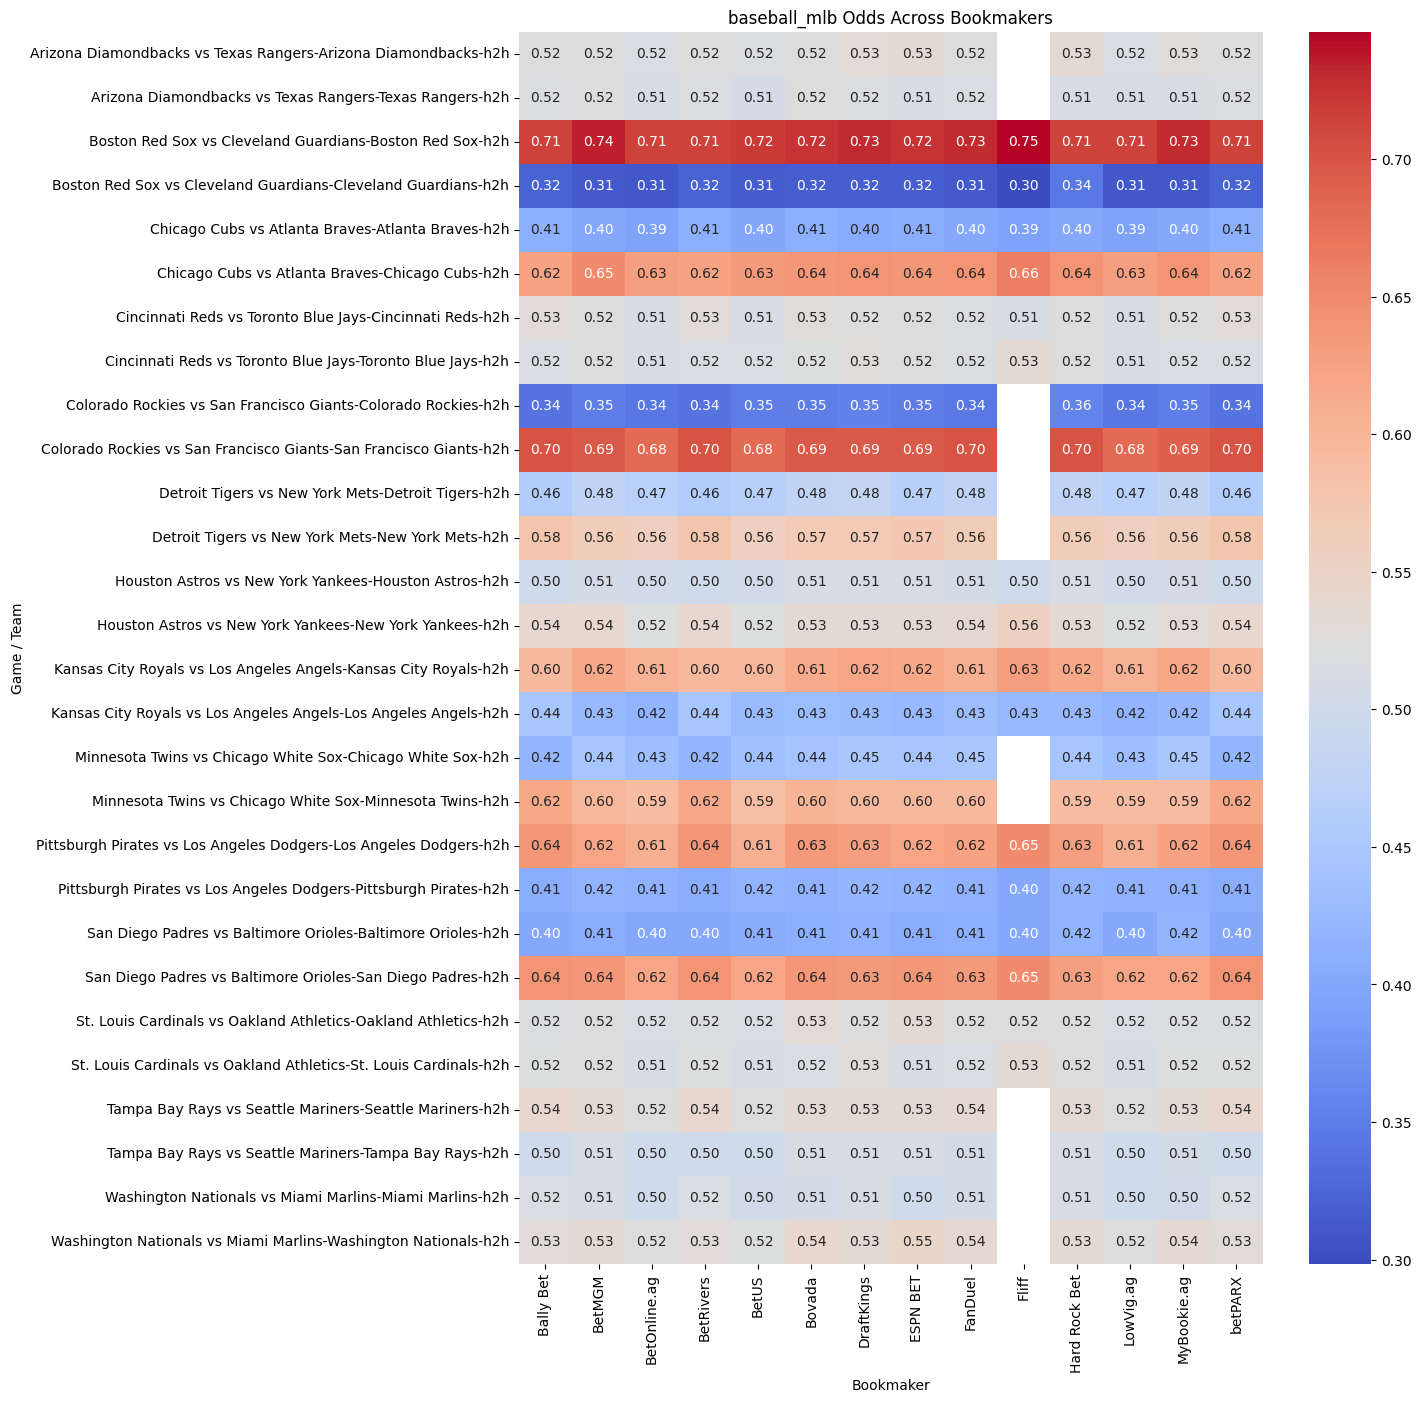

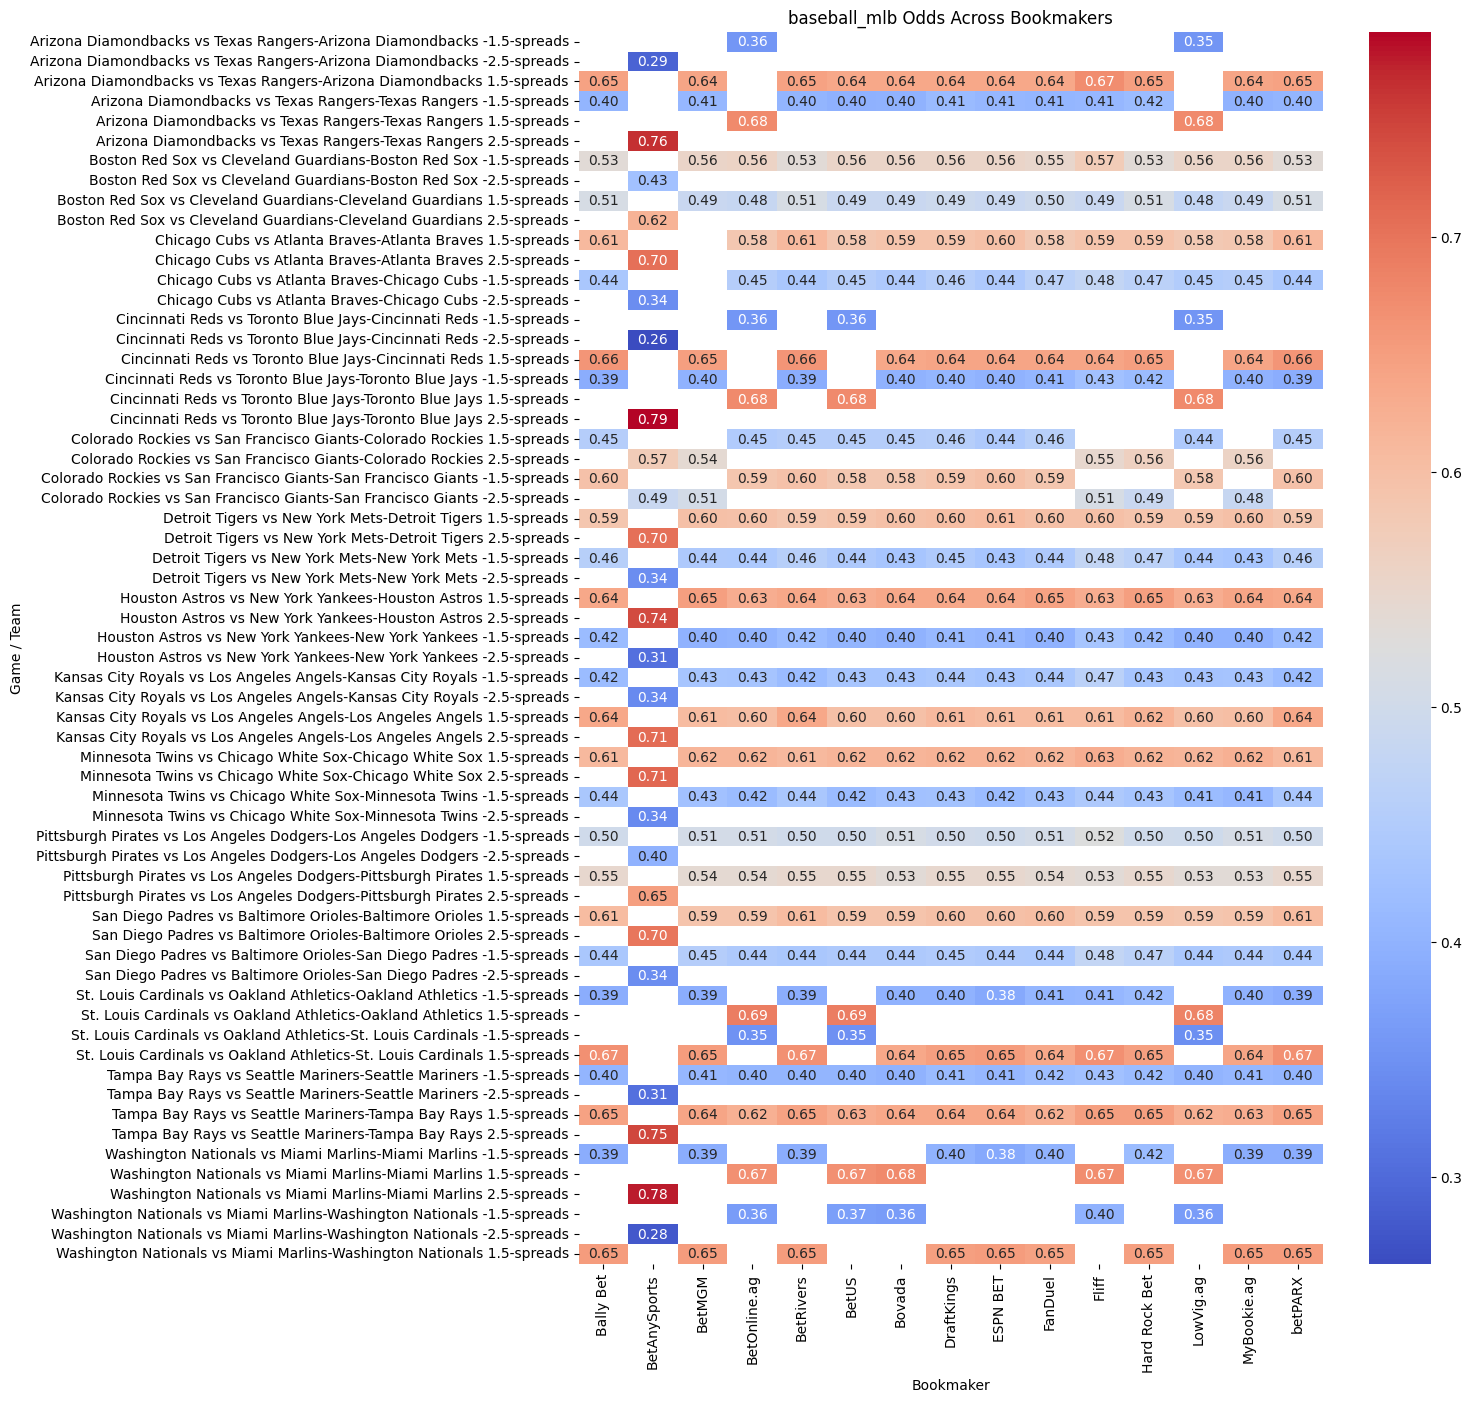

In [18]:
# Pivot so teams are rows and bookmakers are columns
for m in df['market'].unique():
    sub_df = df.loc[df['market']==m]
    pivot_df = sub_df.pivot_table(
        index=["game", "team", "market"],
        columns="bookmaker",
        values="implied_prob"
    )

    plt.figure(figsize=(12,16))
    sns.heatmap(pivot_df, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title(f"{t_sport_keys[league_index]} Odds Across Bookmakers")
    plt.ylabel("Game / Team")
    plt.xlabel("Bookmaker")
    plt.show()


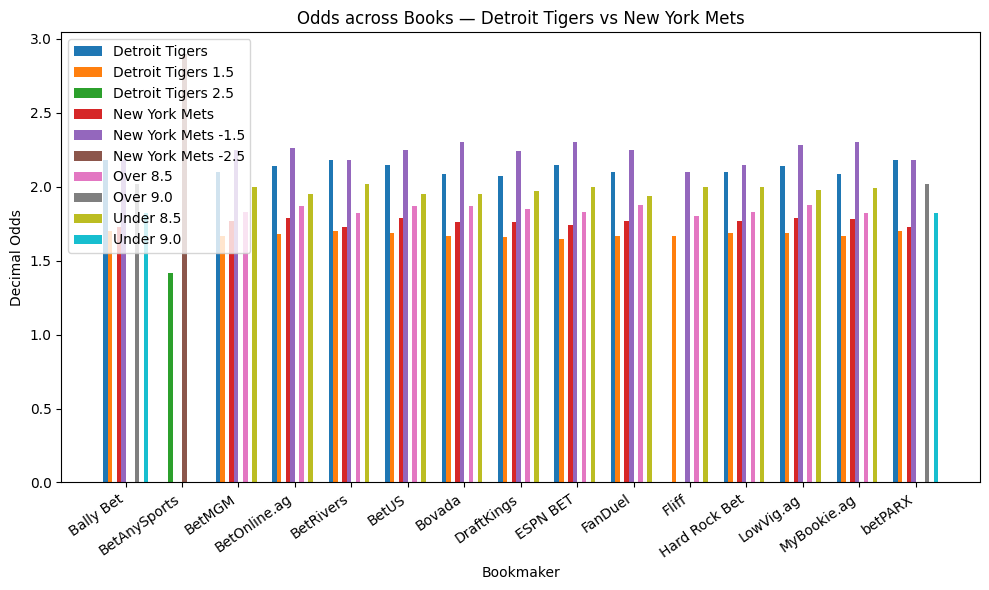

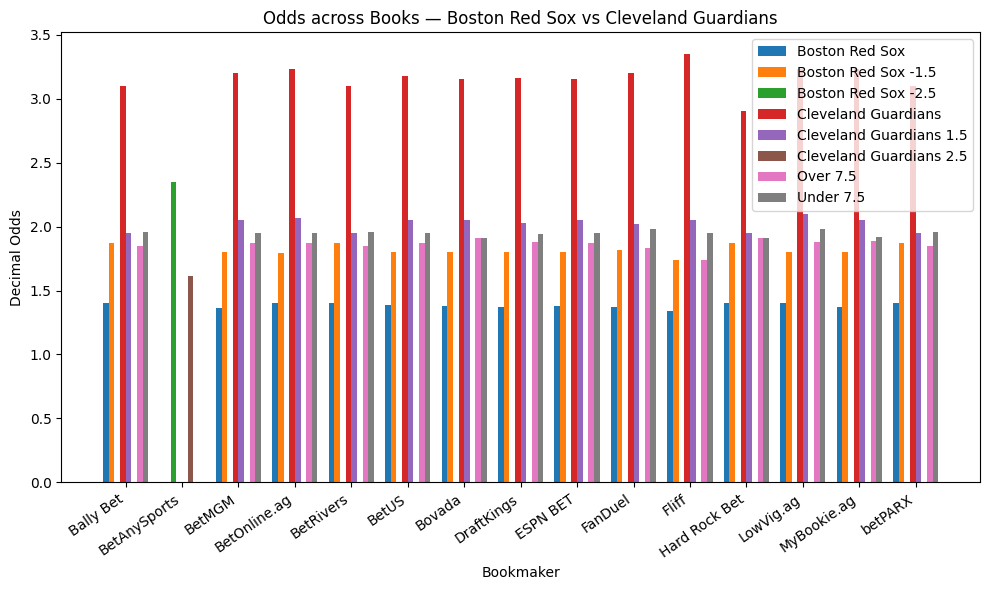

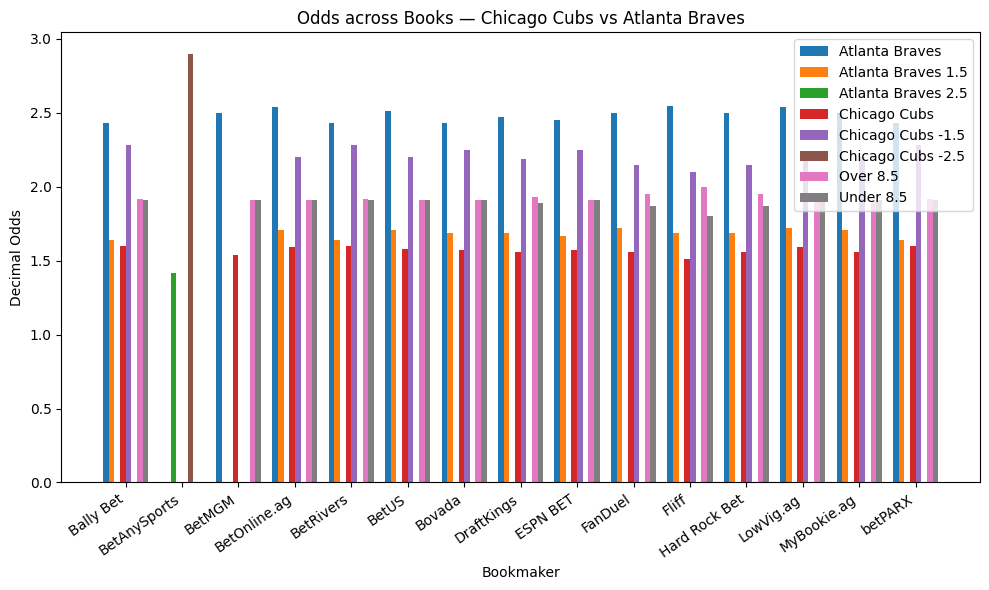

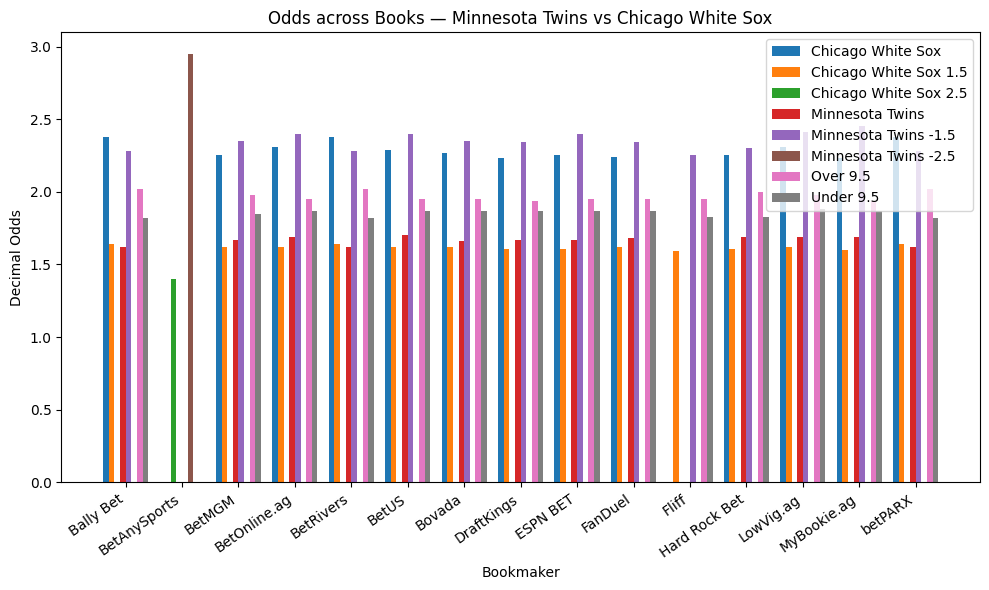

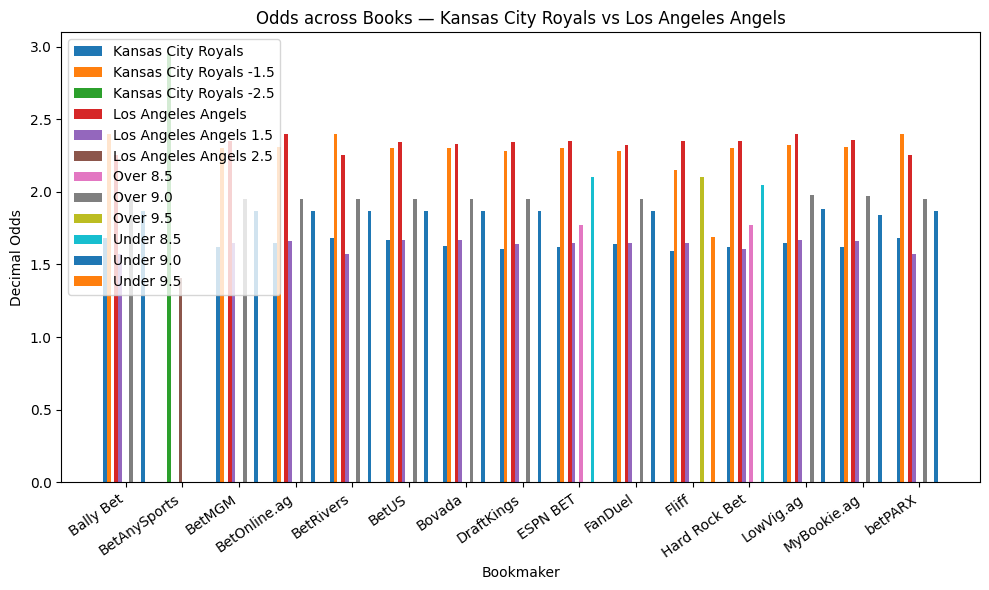

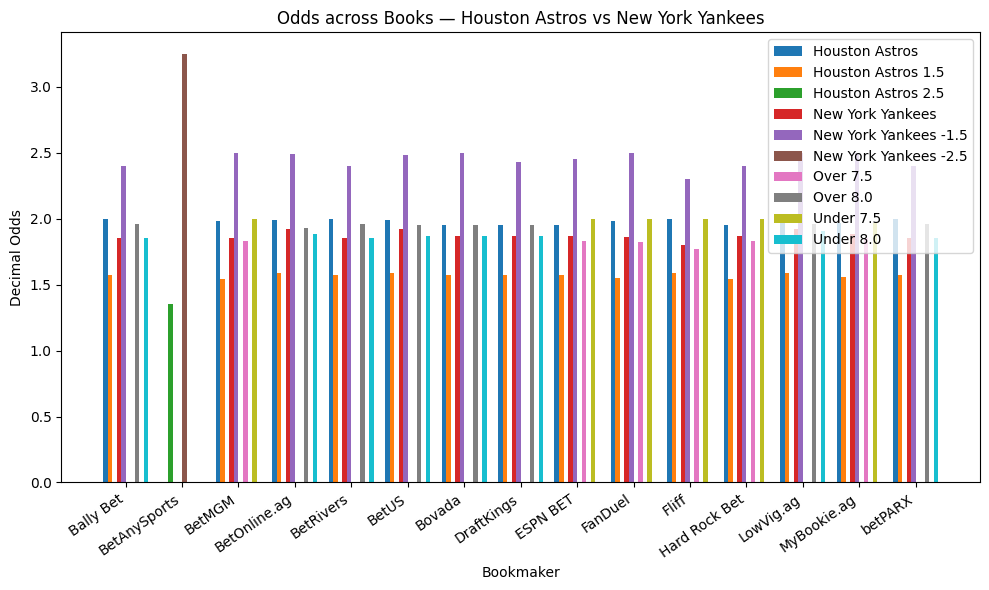

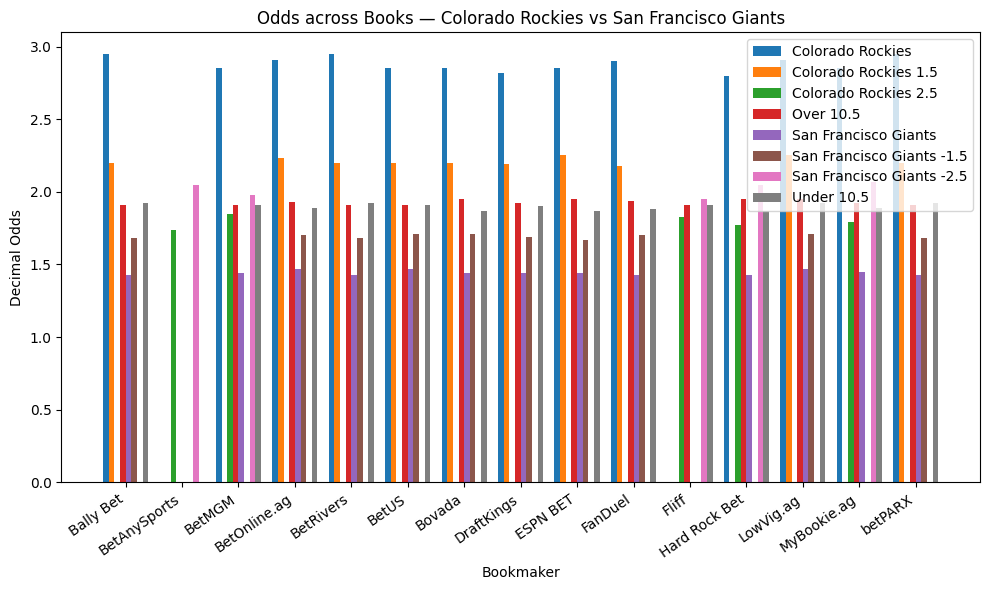

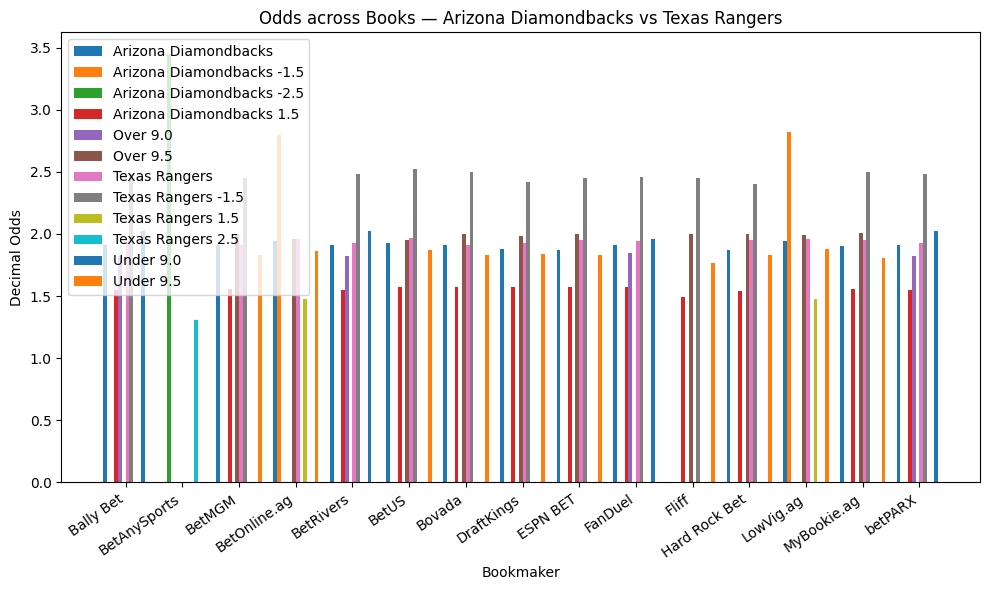

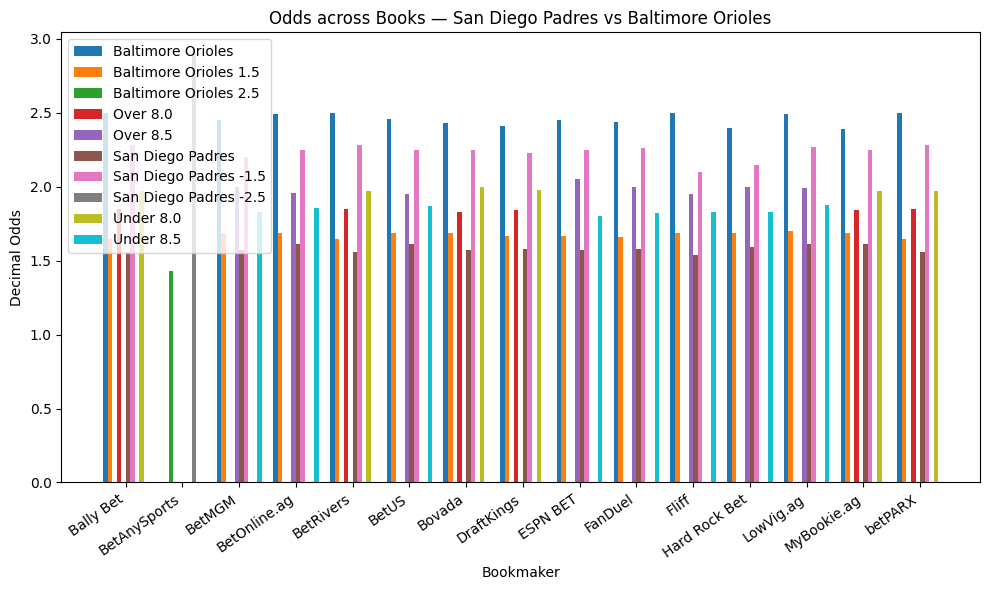

In [19]:
# 2) Fix the earlier bar plotting issue by pivoting (prevents overwrites)
#    -> one grouped bar chart per game, all games automatically
def plot_all_games_grouped(df: pd.DataFrame, value_col: str = "decimal_odds"):
    games = df["game"].unique()
    for game in games:
        sub = df[df["game"] == game].copy()
        # pivot: rows=team, cols=bookmaker
        pivot = sub.pivot_table(index="team", columns="bookmaker", values=value_col, aggfunc="mean")
        # consistent bookmaker order
        bookmakers = list(pivot.columns)
        teams = list(pivot.index)

        # grouped bars: x = bookmakers, 2 bars (or more) per bookmaker, one per team
        x = np.arange(len(bookmakers))
        width = 0.8 / max(2, len(teams))  # spread bars across each bookmaker

        plt.figure(figsize=(10, 6))
        for i, team in enumerate(teams):
            y = pivot.loc[team, bookmakers].values.astype(float)
            plt.bar(x + (i - (len(teams)-1)/2)*width, y, width=width, label=team)

        yl = "Decimal Odds" if value_col == "decimal_odds" else "Implied Probability"
        plt.title(f"Odds across Books — {game}")
        plt.xlabel("Bookmaker")
        plt.ylabel(yl)
        plt.xticks(x, bookmakers, rotation=35, ha="right")
        plt.legend()
        plt.tight_layout()
        plt.show()

# Example: decimal odds charts for all games
plot_all_games_grouped(df, value_col="decimal_odds")


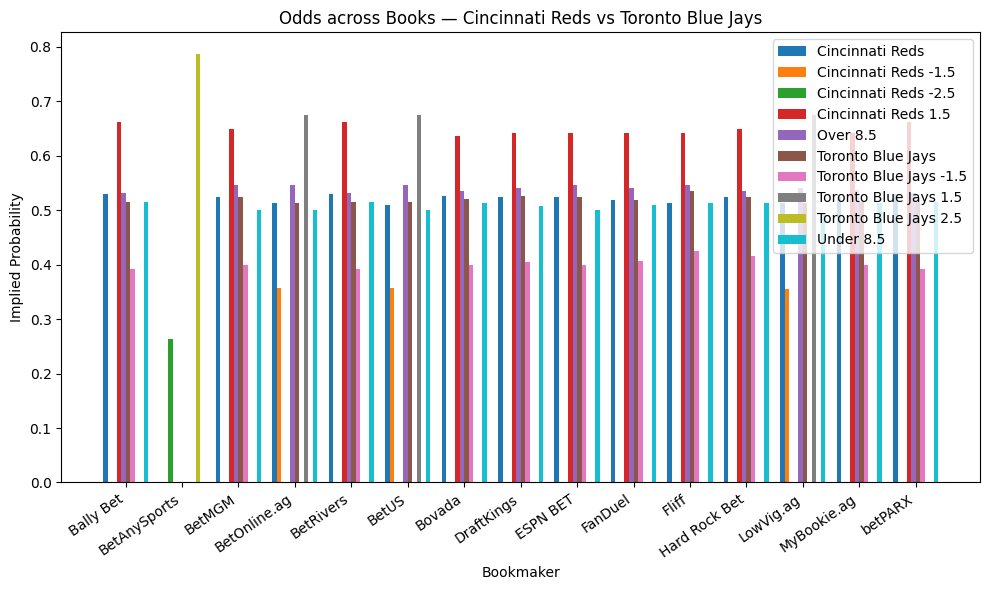

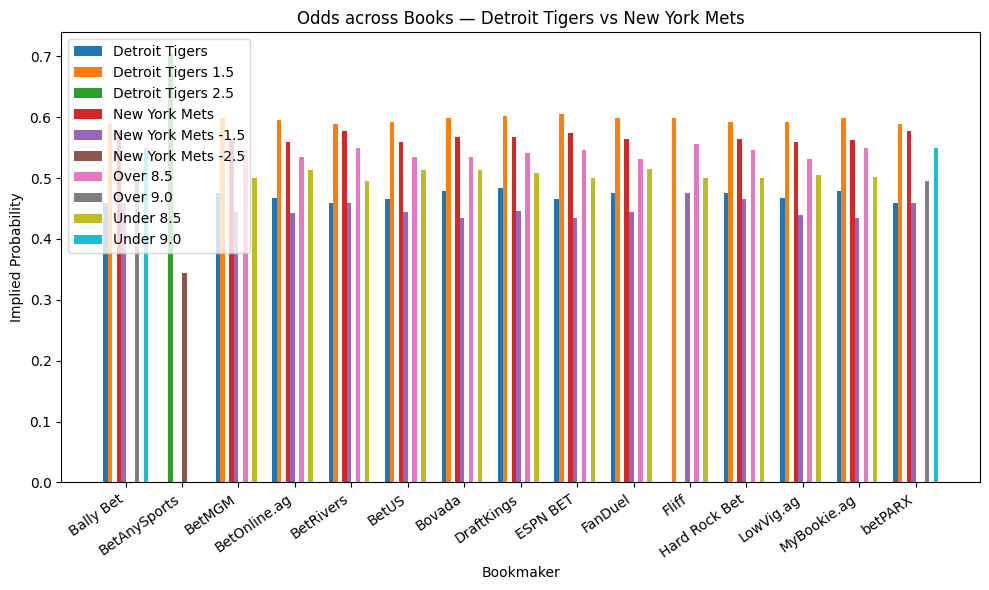

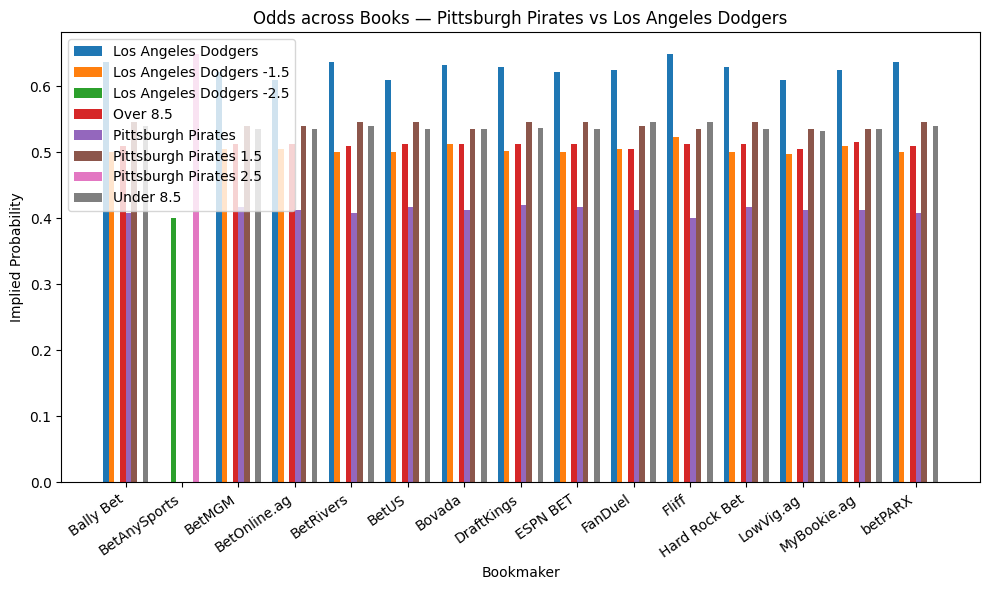

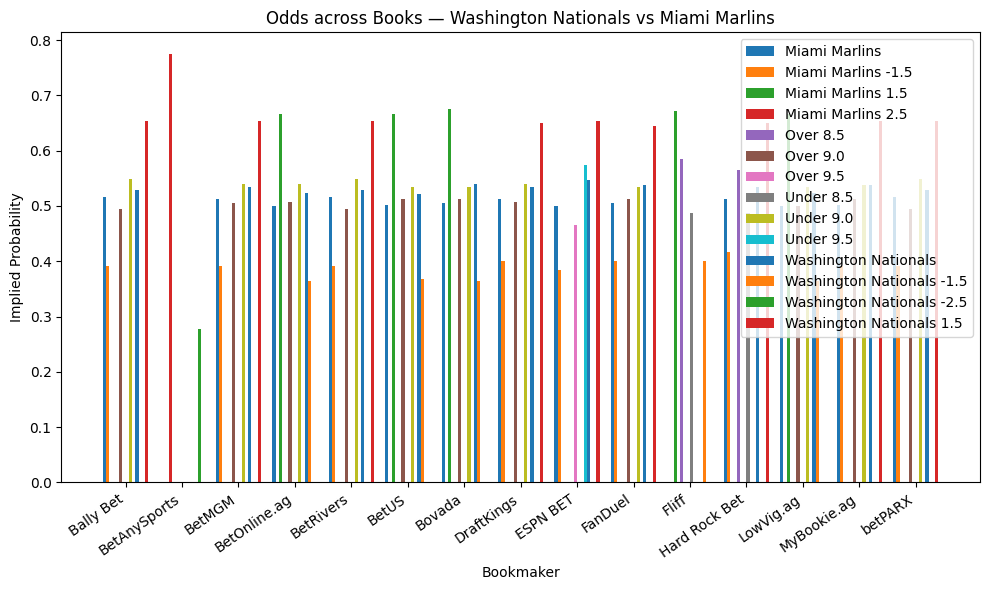

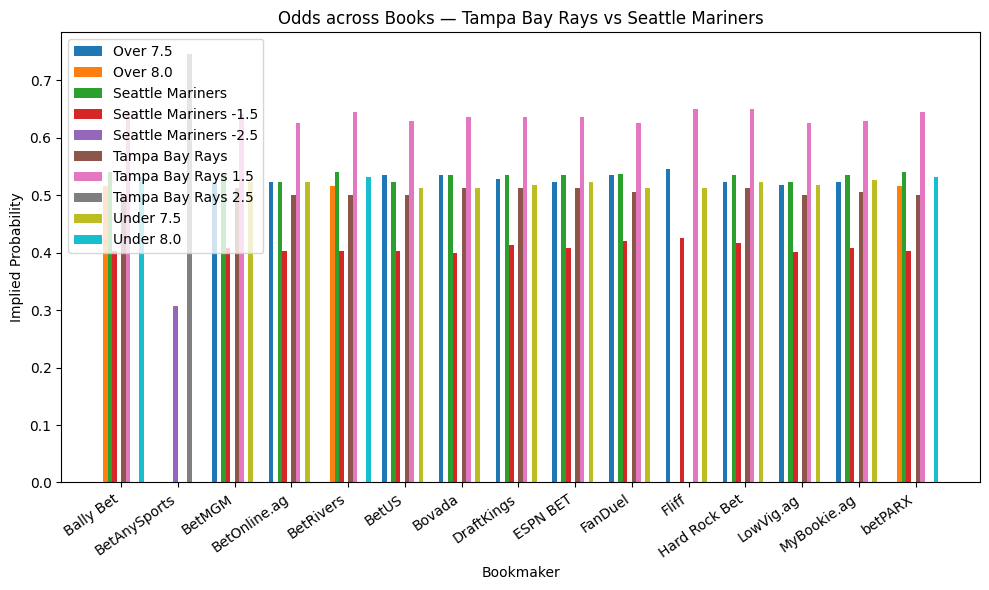

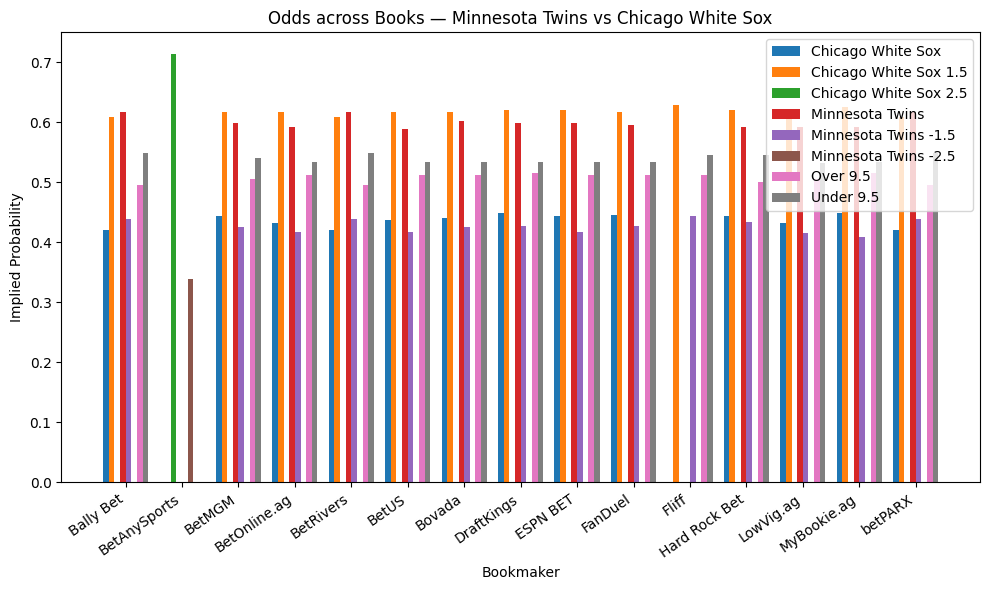

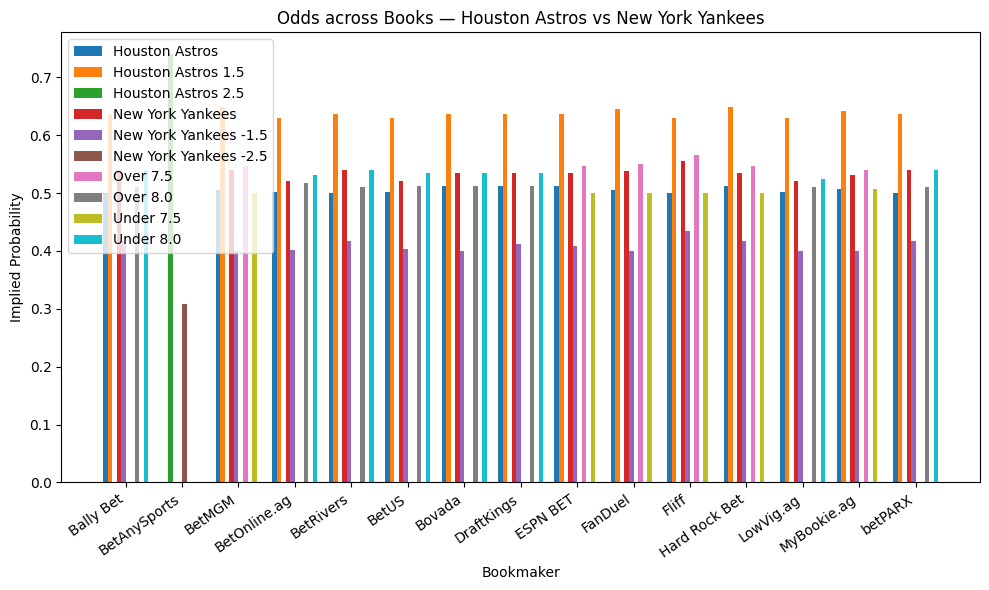

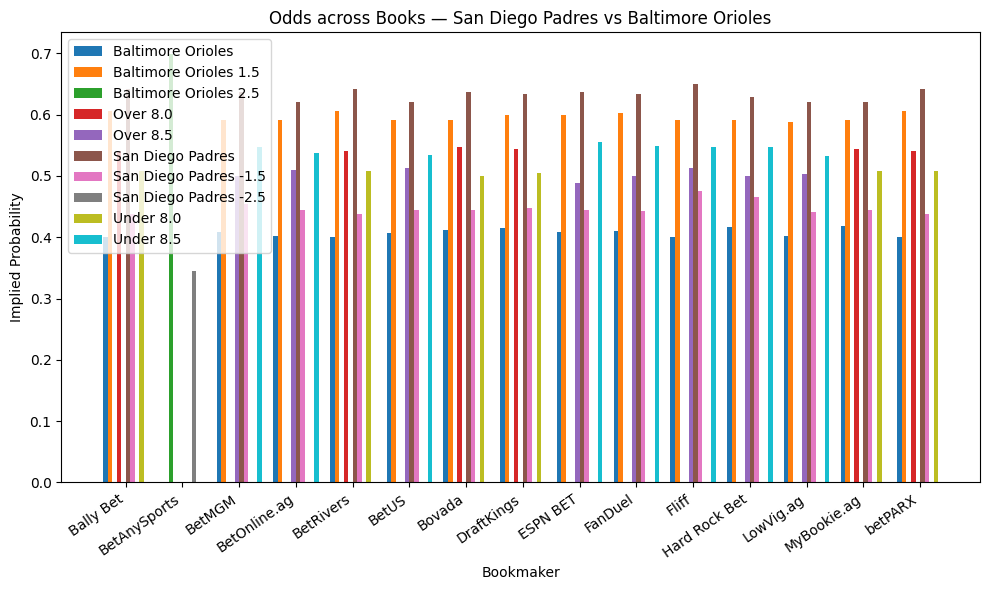

In [20]:
# Example: implied probabilities (0–1) for all games
plot_all_games_grouped(df, value_col="implied_prob")

In [21]:
# 3) Optional: "best price by team" table (useful for line shopping)
def best_prices(df: pd.DataFrame) -> pd.DataFrame:
    idx = df.groupby(["game", "team"])["decimal_odds"].idxmax()
    best = df.loc[idx, ["game", "team", "decimal_odds", "bookmaker"]].sort_values(["game","team"])
    best = best.rename(columns={"decimal_odds": "best_decimal", "bookmaker": "best_book"})
    return best.reset_index(drop=True)

best_prices(df)


game                       team  \
0    Arizona Diamondbacks vs Texas Rangers       Arizona Diamondbacks   
1    Arizona Diamondbacks vs Texas Rangers  Arizona Diamondbacks -1.5   
2    Arizona Diamondbacks vs Texas Rangers  Arizona Diamondbacks -2.5   
3    Arizona Diamondbacks vs Texas Rangers   Arizona Diamondbacks 1.5   
4    Arizona Diamondbacks vs Texas Rangers                   Over 9.0   
..                                     ...                        ...   
133  Washington Nationals vs Miami Marlins                  Under 9.5   
134  Washington Nationals vs Miami Marlins       Washington Nationals   
135  Washington Nationals vs Miami Marlins  Washington Nationals -1.5   
136  Washington Nationals vs Miami Marlins  Washington Nationals -2.5   
137  Washington Nationals vs Miami Marlins   Washington Nationals 1.5   

     best_decimal     best_book  
0            1.94  BetOnline.ag  
1            2.82     LowVig.ag  
2            3.45  BetAnySports  
3            1.57       FanDuel  
4            1.85       FanDuel  
..            ...           ...  
133          1.74      ESPN BET  
134          1.92         BetUS  
135          2.75     LowVig.ag  
136          3.60  BetAnySports  
137          1.55       FanDuel  

[138 rows x 4 columns]

In [22]:
# 4) Optional: quick market snapshot per game (favorite vs underdog, average prices)
def market_snapshot(df: pd.DataFrame) -> pd.DataFrame:
    # average decimal odds per team
    avg = (df.groupby(["game", "team", "market"])["decimal_odds"]
             .mean()
             .rename("avg_decimal")
             .reset_index())
    # favorite/underdog label within each game
    avg["rank"] = avg.groupby(["game", "market"])["avg_decimal"].rank(method="first")
    avg["role"] = avg.groupby(["game", "market"])["avg_decimal"].transform(lambda s: ["favorite" if x==s.min() else "underdog" for x in s])
    return avg.sort_values(["game","role","avg_decimal"]).reset_index(drop=True)

snap = market_snapshot(df)
snap


game                       team  \
0    Arizona Diamondbacks vs Texas Rangers          Texas Rangers 2.5   
1    Arizona Diamondbacks vs Texas Rangers                   Over 9.0   
2    Arizona Diamondbacks vs Texas Rangers       Arizona Diamondbacks   
3    Arizona Diamondbacks vs Texas Rangers          Texas Rangers 1.5   
4    Arizona Diamondbacks vs Texas Rangers   Arizona Diamondbacks 1.5   
..                                     ...                        ...   
133  Washington Nationals vs Miami Marlins                  Under 8.5   
134  Washington Nationals vs Miami Marlins                   Over 9.5   
135  Washington Nationals vs Miami Marlins         Miami Marlins -1.5   
136  Washington Nationals vs Miami Marlins  Washington Nationals -1.5   
137  Washington Nationals vs Miami Marlins  Washington Nationals -2.5   

      market  avg_decimal  rank      role  
0    spreads     1.310000   1.0  favorite  
1     totals     1.827500   1.0  favorite  
2        h2h     1.906923   1.0  favorite  
3    spreads     1.480000   2.0  underdog  
4    spreads     1.554167   3.0  underdog  
..       ...          ...   ...       ...  
133   totals     2.050000   5.0  underdog  
134   totals     2.150000   6.0  underdog  
135  spreads     2.527778   4.0  underdog  
136  spreads     2.692000   5.0  underdog  
137  spreads     3.600000   6.0  underdog  

[138 rows x 6 columns]

In [23]:
df = df.merge(snap, left_on=['game', 'team','market'], right_on=['game', 'team', 'market'], how='outer')
df

game             commence_time  \
0     Arizona Diamondbacks vs Texas Rangers 2025-09-03 01:40:00+00:00   
1     Arizona Diamondbacks vs Texas Rangers 2025-09-03 01:40:00+00:00   
2     Arizona Diamondbacks vs Texas Rangers 2025-09-03 01:40:00+00:00   
3     Arizona Diamondbacks vs Texas Rangers 2025-09-03 01:40:00+00:00   
4     Arizona Diamondbacks vs Texas Rangers 2025-09-03 01:40:00+00:00   
...                                     ...                       ...   
1183  Washington Nationals vs Miami Marlins 2025-09-02 22:45:00+00:00   
1184  Washington Nationals vs Miami Marlins 2025-09-02 22:45:00+00:00   
1185  Washington Nationals vs Miami Marlins 2025-09-02 22:45:00+00:00   
1186  Washington Nationals vs Miami Marlins 2025-09-02 22:45:00+00:00   
1187  Washington Nationals vs Miami Marlins 2025-09-02 22:45:00+00:00   

          bookmaker                      team  decimal_odds  implied_prob  \
0           FanDuel      Arizona Diamondbacks          1.91      0.523560   
1         BetRivers      Arizona Diamondbacks          1.91      0.523560   
2         Bally Bet      Arizona Diamondbacks          1.91      0.523560   
3           betPARX      Arizona Diamondbacks          1.91      0.523560   
4       MyBookie.ag      Arizona Diamondbacks          1.90      0.526316   
...             ...                       ...           ...           ...   
1183  Hard Rock Bet  Washington Nationals 1.5          1.54      0.649351   
1184       ESPN BET  Washington Nationals 1.5          1.53      0.653595   
1185        betPARX  Washington Nationals 1.5          1.53      0.653595   
1186      Bally Bet  Washington Nationals 1.5          1.53      0.653595   
1187      BetRivers  Washington Nationals 1.5          1.53      0.653595   

       market  avg_decimal  rank      role  
0         h2h     1.906923   1.0  favorite  
1         h2h     1.906923   1.0  favorite  
2         h2h     1.906923   1.0  favorite  
3         h2h     1.906923   1.0  favorite  
4         h2h     1.906923   1.0  favorite  
...       ...          ...   ...       ...  
1183  spreads     1.534444   3.0  underdog  
1184  spreads     1.534444   3.0  underdog  
1185  spreads     1.534444   3.0  underdog  
1186  spreads     1.534444   3.0  underdog  
1187  spreads     1.534444   3.0  underdog  

[1188 rows x 10 columns]

In [24]:
dk_games = df.loc[df['bookmaker']=='DraftKings', 'game'].unique()
dk_games

array(['Arizona Diamondbacks vs Texas Rangers',
       'Boston Red Sox vs Cleveland Guardians',
       'Chicago Cubs vs Atlanta Braves',
       'Cincinnati Reds vs Toronto Blue Jays',
       'Colorado Rockies vs San Francisco Giants',
       'Detroit Tigers vs New York Mets',
       'Houston Astros vs New York Yankees',
       'Kansas City Royals vs Los Angeles Angels',
       'Minnesota Twins vs Chicago White Sox',
       'Pittsburgh Pirates vs Los Angeles Dodgers',
       'San Diego Padres vs Baltimore Orioles',
       'St. Louis Cardinals vs Oakland Athletics',
       'Tampa Bay Rays vs Seattle Mariners',
       'Washington Nationals vs Miami Marlins'], dtype=object)

In [25]:
target_df = df.loc[df['game'].isin(dk_games)]

In [26]:
df2 = target_df.loc[target_df['rank']==1.0]

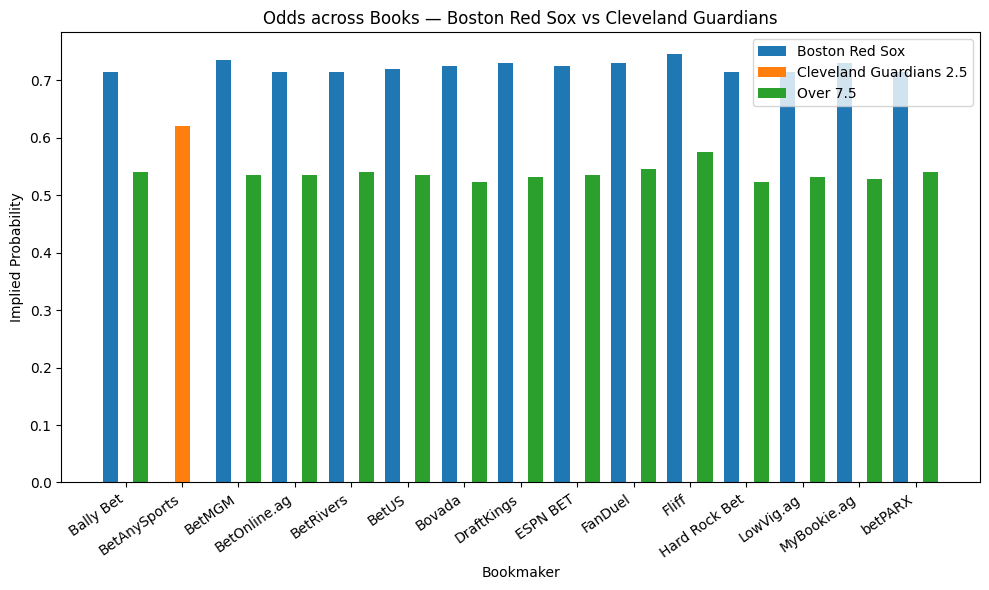

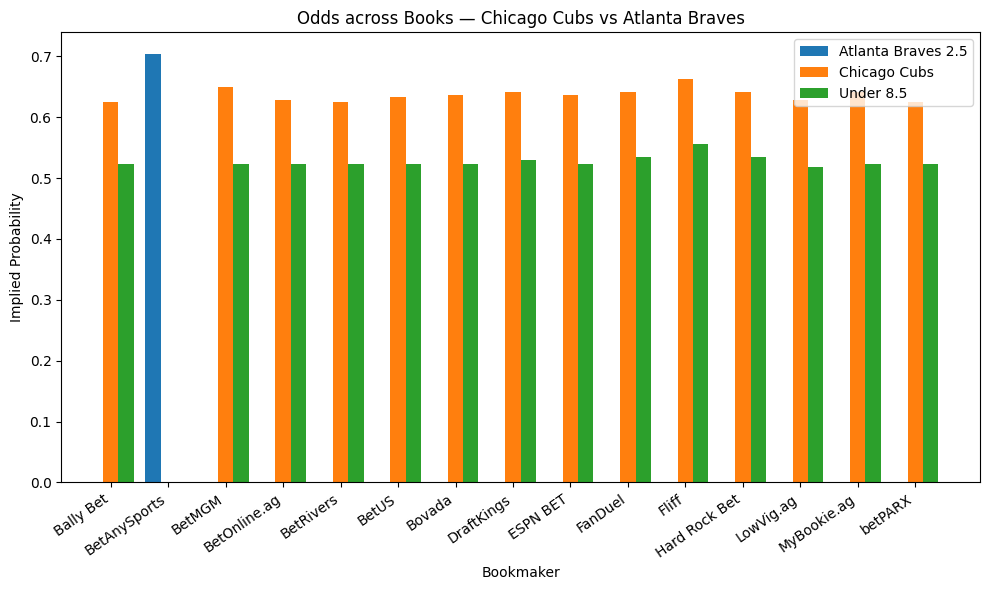

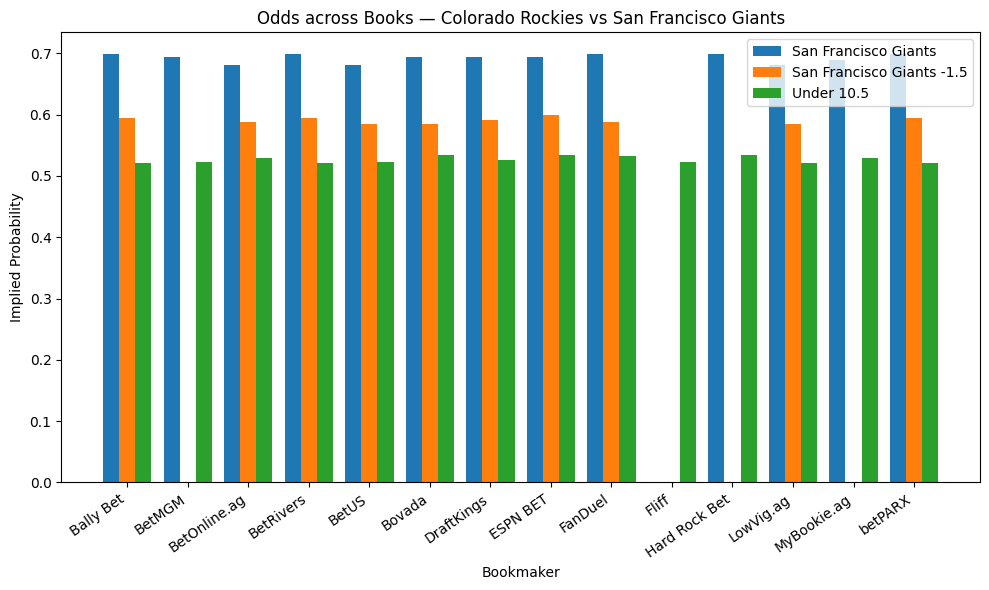

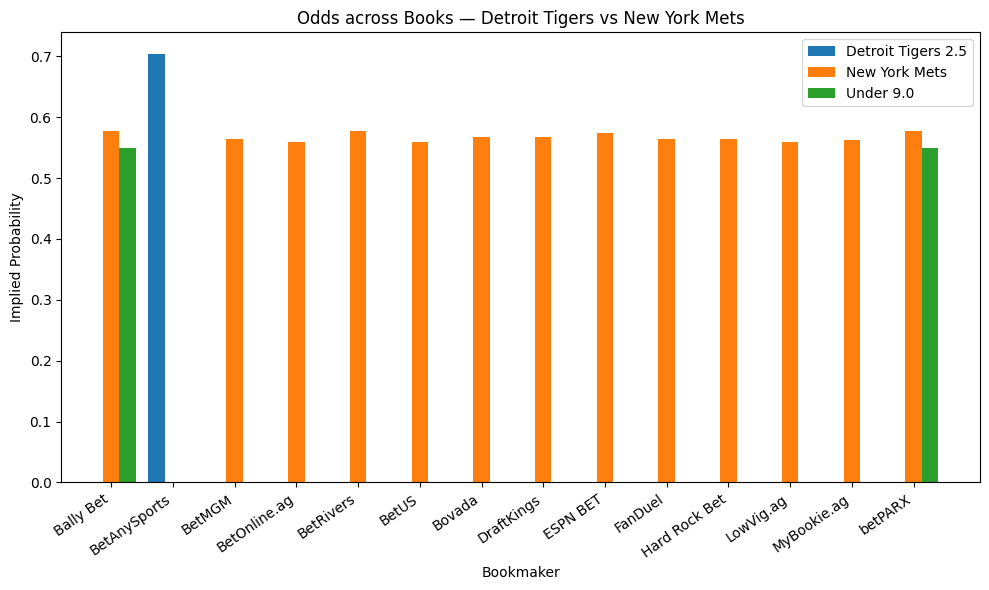

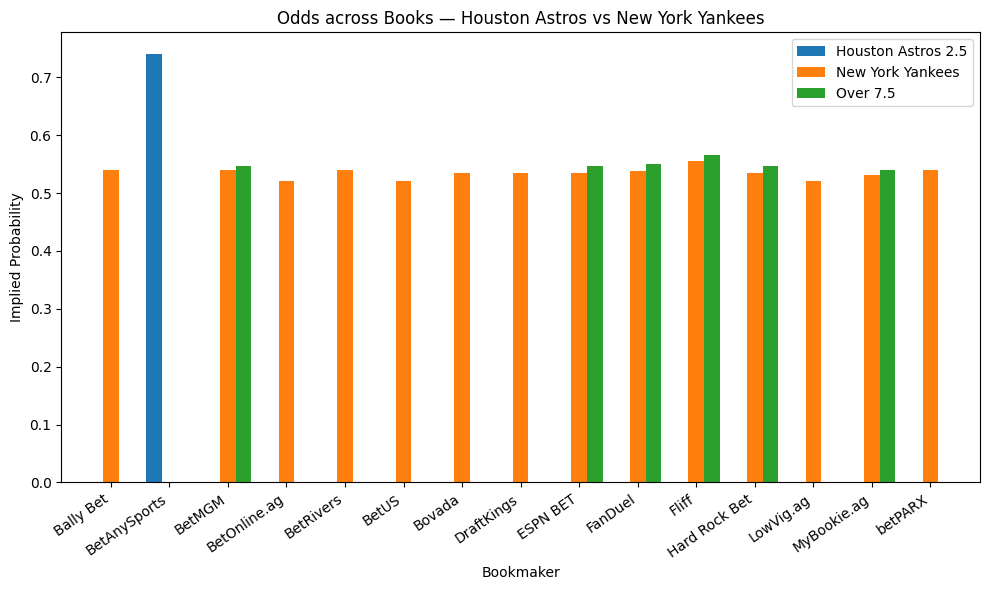

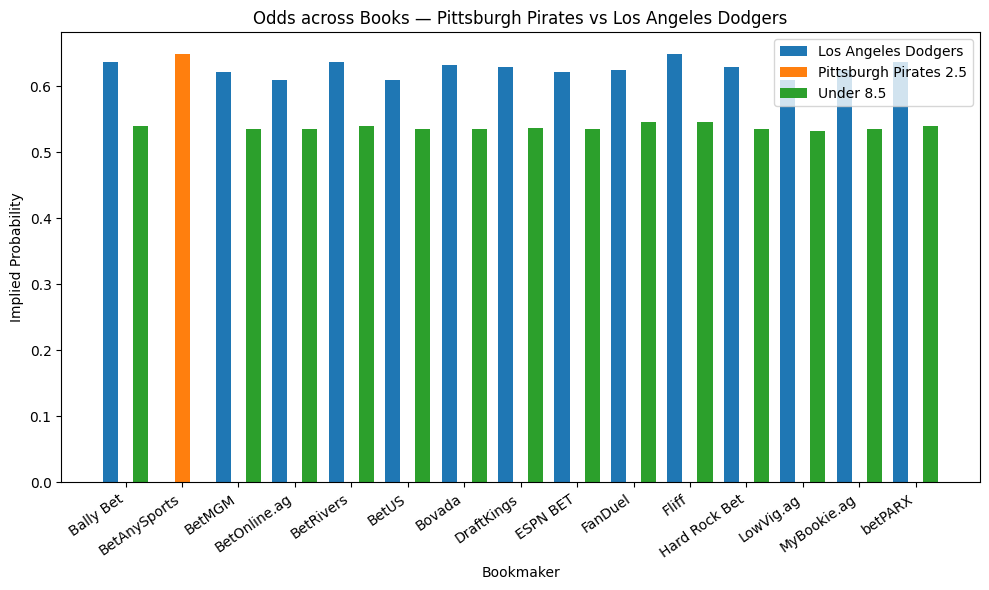

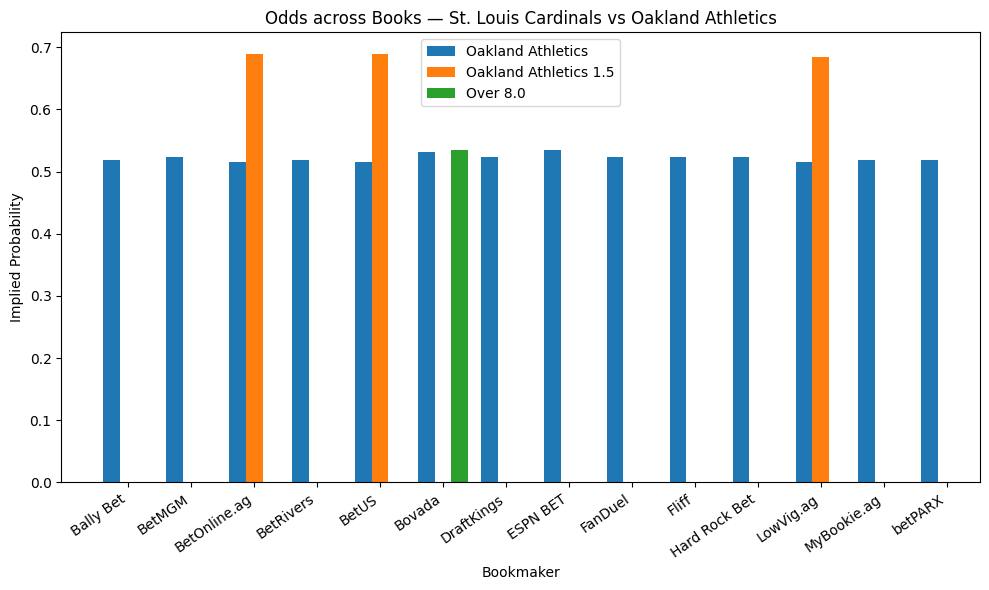

In [27]:
plot_all_games_grouped(df2, value_col="implied_prob")

In [28]:
df2['league'] = t_sport_keys[league_index]
df2.to_csv(f'./odds_data/{today_str}_{t_sport_keys[league_index]}.csv',index=False)

C:\Users\Max\AppData\Local\Temp\ipykernel_5812\58621993.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['league'] = t_sport_keys[league_index]


In [31]:
df2.to_clipboard()

In [30]:
r2.headers['X-Requests-Used']

'30'